# Projet 10 : Détectez des faux billets

#### <a href='#T1'> 1 - Import </a>
#### <a href='#T2'> 2 - Analyse DF </a>

#### <a href='#T3'>3 - Régression lineare multiple </a>
- <a href='#T20'>3.1 - Evaluation du modèle</a>
- <a href='#T4'>3.2 - Analyse des résidus </a></br>
- <a href='#T5'>3.3 - Analyse colinéarité des variables</a> </br>
- <a href='#T6'>3.4 - Analyse de l’homoscédasticité </a></br>
- <a href='#T7'>3.5 - Prédictions des valeurs </a>

#### <a href='#T8'>4 - Analyse des données </a>
#### <a href='#T9'>5 - Régression logistique</a>
- <a href='#T10'>5.1 - Évaluation modèle </a></br>
- <a href='#T11'>5.2 - Matrice de confusion</a> </br>


#### <a href='#T13'>6 - KMeans</a>
- <a href='#T14'>6.1 - Matrice de confusion</a> </br>
- <a href = '#T15'> 6.2 - Valeurs test </a>

#### <a name = 'T1'>1 -  Import</a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.stats import shapiro
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# import fichier
df = pd.read_csv('billets.csv', sep=';')

In [3]:
# initalization seaborn
sns.set()

#### <a name = 'T2'>2 - Analyse DF </a>

In [4]:
# affichage df
df.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


In [5]:
# controle dimension df
df.shape

(1500, 7)

In [6]:
# controle valeurs nulles
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Presence de 37 valeurs nulles dans le df, on vas alors utiliser un **régression linéaire multiple** pour les trouver

#### <a name = 'T3'>3 - Régression linéaire multiple</a>

In [7]:
# création df avec valeurs manquantes
df_m = df[df['margin_low'].isnull()]

In [8]:
# drop valeurs nan
df.dropna(inplace = True)

In [9]:
# test size
x_train, x_test, y_train, y_test = train_test_split(
    df,df['margin_low'], test_size=0.20, random_state=0)

In [10]:
# regression multiple - analyse variables non significatives
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=x_train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     314.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          3.69e-239
Time:                        11:52:05   Log-Likelihood:                -604.92
No. Observations:                1170   AIC:                             1224.
Df Residuals:                    1163   BIC:                             1259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.9022      9

On commence par retirer la colonne height_right qui as une p valeur de $0,678$

In [11]:
# regression multiple - analyse variables non significatives
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+margin_up+length', data=x_train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     377.1
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.97e-240
Time:                        11:52:05   Log-Likelihood:                -605.00
No. Observations:                1170   AIC:                             1222.
Df Residuals:                    1164   BIC:                             1252.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.4126      8

On vas retirer la colonne lenght qui as une p valeur de $0.612$

In [12]:
# regression multiple - analyse variables non significatives
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=x_train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     470.7
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.85e-241
Time:                        11:52:05   Log-Likelihood:                -605.78
No. Observations:                1170   AIC:                             1222.
Df Residuals:                    1165   BIC:                             1247.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6631      5

On vas retirer la colonne height_right qui a une p valeur de $0.721$

In [13]:
# regression multiple - analyse variables non significatives
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=x_train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     628.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          7.24e-243
Time:                        11:52:05   Log-Likelihood:                -605.85
No. Observations:                1170   AIC:                             1220.
Df Residuals:                    1166   BIC:                             1240.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1080      4

maintenant on retire height_leftqui a une p valeur de $0.420$

In [14]:
# regression multiple - analyse variables non significatives
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=x_train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          2.89e-244
Time:                        11:52:05   Log-Likelihood:                -606.17
No. Observations:                1170   AIC:                             1218.
Df Residuals:                    1167   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6622      0

Maintenant on est arrivée à des p-valeurs qui respectent le niveaux de confiacne de 5% 

In [15]:
# création variable pour effectuer les predictions des valeurs test
pred_lin = round(reg_multi.predict(x_test),2)

#### <a name = 'T20'> 3.1 - Evaluation du modèle </a>

In [16]:
# calcul des erreurs quadratique moyenne et moyenne absolue pour évaluer le modèle 
print('Erreur quadratique moyenne : ', mean_squared_error(y_test, pred_lin))
print('Erreur moyenne absolue : ', mean_absolute_error(y_test, pred_lin))

Erreur quadratique moyenne :  0.1850133105802048
Erreur moyenne absolue :  0.3360068259385665


In [17]:
# calcul du r2 score
score = r2_score(y_test, pred_lin)
print('Score du modèle : ', score, 'Équivaut à : ', round(score * 100,2), '%')

Score du modèle :  0.610409597282358 Équivaut à :  61.04 %


#### <a name = 'T4'>3.2 - Analyse des résidus </a>

In [18]:
# test normalité des résidu 
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.992205023765564, pvalue=7.613264642714057e-06)

Avec le test Shapiro on cherche a vérifier si le residu suivent une loi normale ou pas </br>
$H_0$ : ne suit pas une loi normale </br>
$H_1$ : le modèle des résidus suive une loi normale

Dans ce cas on observe un p valeur très faible ($7.613264642714057e-06$) < 5, donc il faudra remettre en cause la l'hypothese de normalité. 

On procédé alors avec l'affichage du graphique des residus et des autres test.

In [19]:
residuals = y_test - pred_lin
print('Residuals: ', residuals)

Residuals:  1490    0.80
162    -0.03
762     0.35
1136    0.61
31     -0.43
        ... 
1413    0.73
1258    0.03
444    -0.15
756    -0.36
1084   -0.78
Length: 293, dtype: float64


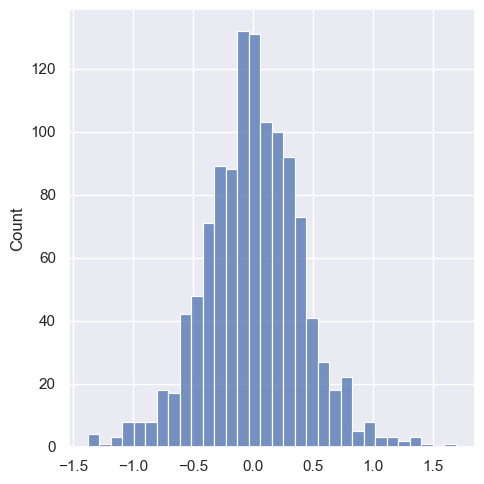

In [20]:
# affichage graphique residus
sns.displot(reg_multi.resid)

Le graphique n'est pas trop différente d'une distribution symmetrique.

##### <a name = 'T5'>3.3 - Test colinéarité des variables</a>

In [21]:
# test de colinearite
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.6179359218241582, 1.617935921824159]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

#### <a name = 'T6'>3.4 - Test de l’homoscédasticité</a>

In [22]:
# test de l'homoscedasticite
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.6223530361977088e-27


Avec Breusch-Pagan on cherche à déterminer s'il y a présence ou non d'hétéroscédasticité, c'est-a-dire si les résidus montre ou pas une variance costante.

Le p-valeur est inferieur à 5 % donc on rejette l'hypothese h_0 et donc les variance ne sont pas constantes.

Vue que le graphiques des résidus montre une distribution plutôt symmetrique, les test de collinearite ne montre pas des résultats absurdes et l'erreur quadratique moyenne et absolue sont proche des 0, on vas mantenir cette modèle.

##### <a name = 'T7'>3.5 - Predictions valeurs nulles</a>

In [23]:
# Prediction valeurs manquantes
margin_low_p = round(reg_multi.predict(df_m),2)

In [24]:
# Ajout des valeurs manquantes
df_m['margin_low'].fillna(margin_low_p, inplace= True) 

C:\Users\Zacca\AppData\Local\Temp\ipykernel_17740\2486946737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['margin_low'].fillna(margin_low_p, inplace= True)


In [25]:
# Ajout de valeurs dans le dataframe
data = df.append(df_m)

C:\Users\Zacca\AppData\Local\Temp\ipykernel_17740\545146327.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df.append(df_m)


In [26]:
# controle dimension DF
data.shape

(1500, 7)

In [27]:
# controle valeurs nulles
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### <a name = 'T8'>4 - Analyse des données </a>

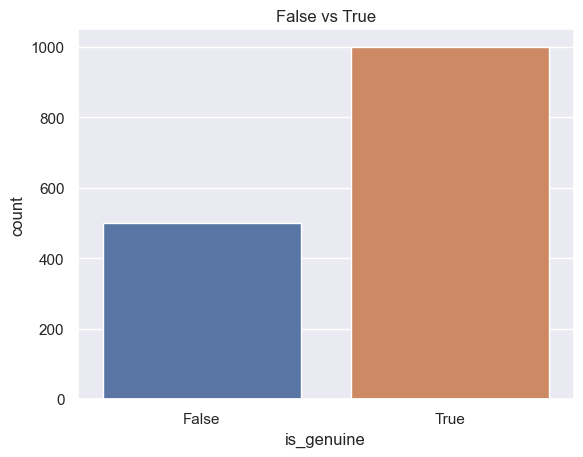

In [28]:
# Controle valeurs faux et vrai
sns.countplot(data=data, x='is_genuine')
plt.title('False vs True')
plt.show()

On observe que il y à en generale plus billets vrai que faux dans le Jeux des données.

In [29]:
# calcul pourcentage valeurs false et valeur true
df['is_genuine'].value_counts(normalize=True)

True     0.663705
False    0.336295
Name: is_genuine, dtype: float64

On observe que le valeurs Vrai representent le $66,37$ % du DF, et le valeurs faux représentent le $33,63$ % du DF

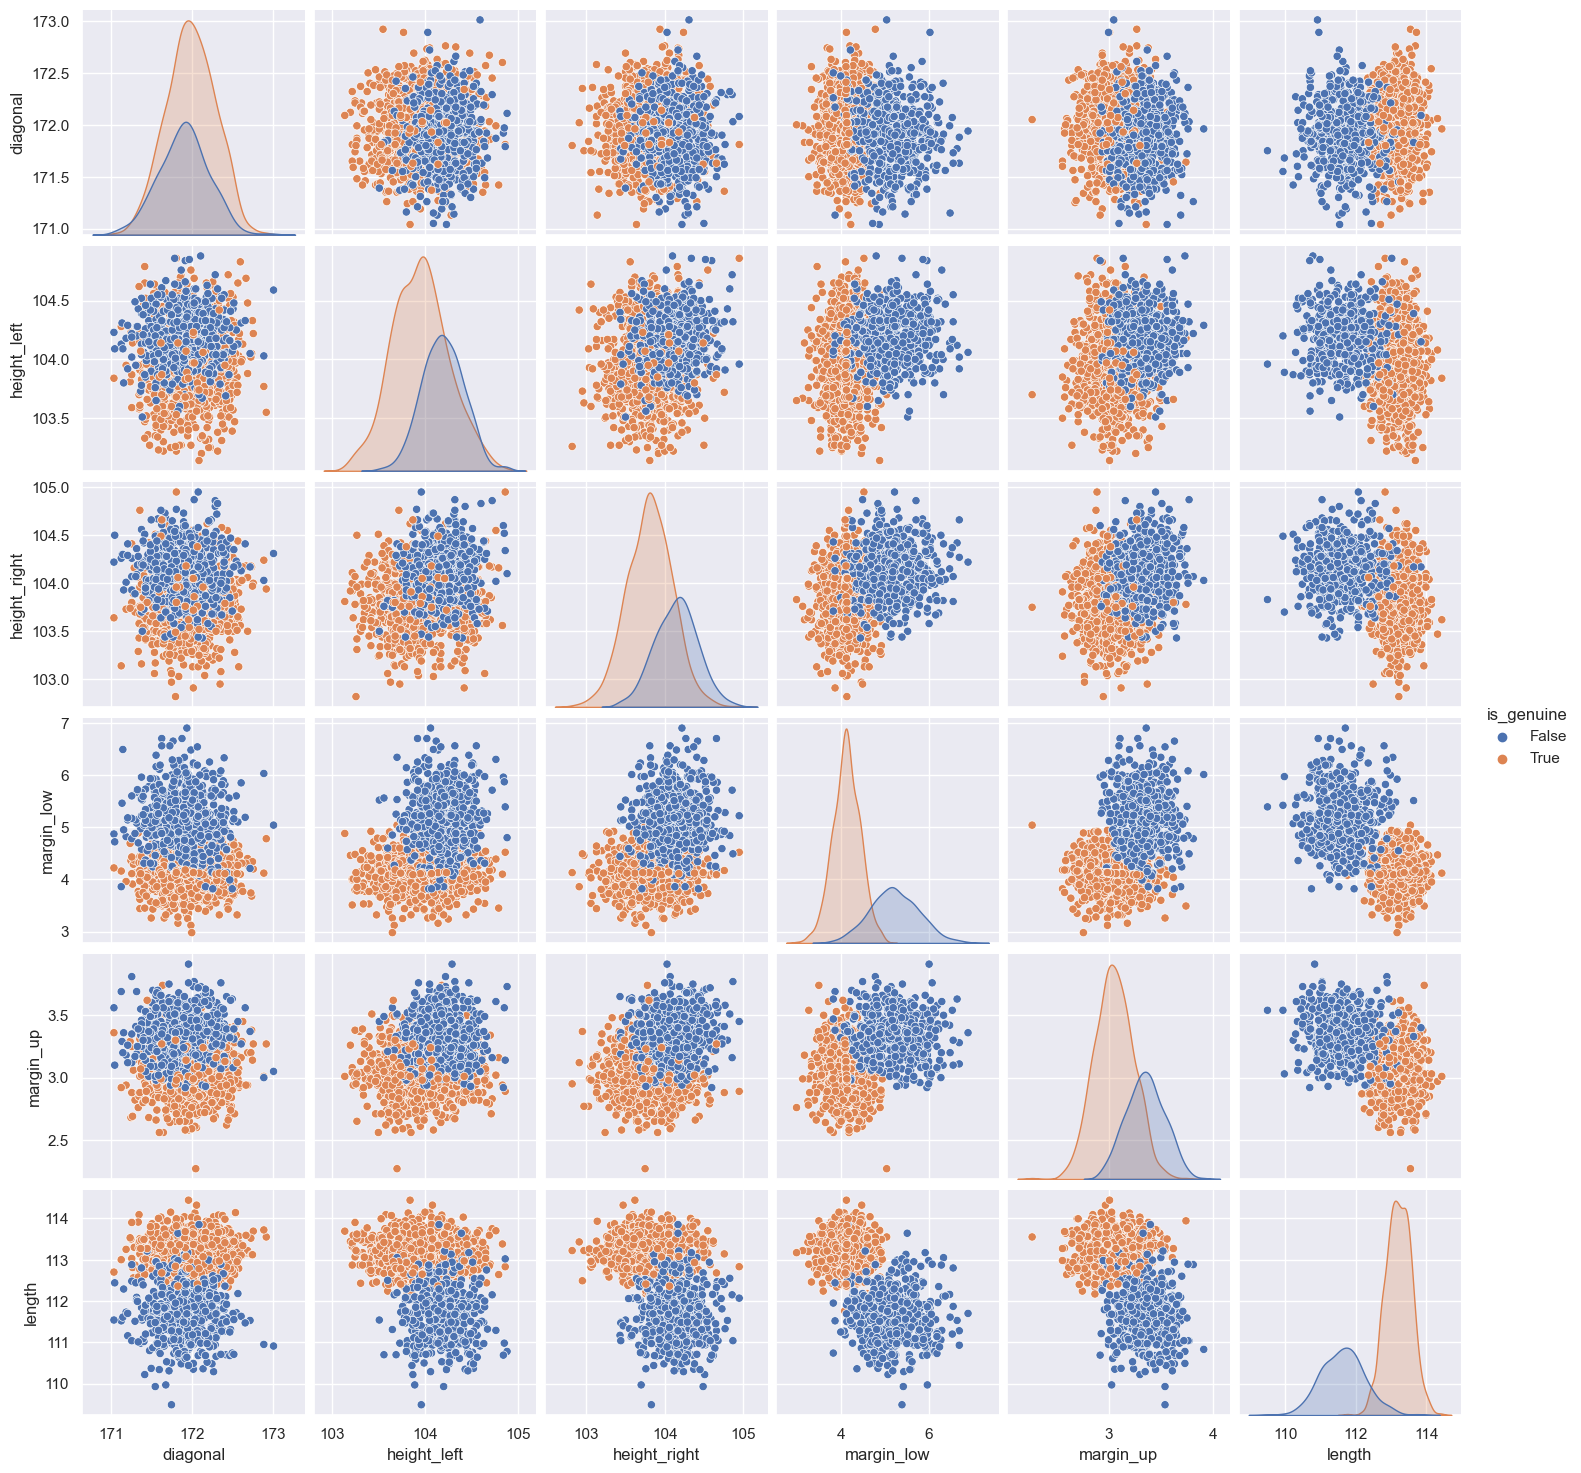

In [30]:
# affichage comportement données 
sns.pairplot(data, hue = 'is_genuine')

Grâce à cette displot, on peut determiner certains caractéristiques qui nous permet de distinguer entre les billet faux et billet vrais.</br>
Par exemple on peut observer que le billets faux, montre une 'Margin_low' plus grande par rapport aux billets vrai.
Ou encore, on peut observer que les billets vrais, sont généralement plus longue par rapport aux billets faux

#### <a name = 'T9'>5 - Régression logistique</a>

In [31]:
# definition target
y = data['is_genuine'] 

In [32]:
# préparation données 
data_1 = data.copy()

In [33]:
# prepartion DF
data_1.drop(columns = 'is_genuine', inplace = True)

In [34]:
# test size
x_train, x_test, y_train, y_test = train_test_split(
    data_1, y, test_size=0.20, random_state=0)

In [35]:
# instancer le modèle
logisticRegr = LogisticRegression()

In [36]:
# Entraînement du modèle 
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [37]:
# predict 
logisticRegr.predict(x_test[:5])

array([ True,  True, False,  True, False])

In [38]:
# predictions des valeurs de test
predictions = logisticRegr.predict(x_test)

##### <a name = 'T10'>5.1 Évaluation modèle </a>

On détermine avec l'accuracy score combien des valeurs sont predit de manière correcte par le modele de régression logistique.

In [39]:
# Accuracy score
score = logisticRegr.score(x_test,y_test)
print(score)

0.9866666666666667


Le score est proche de 100% donc on observe un modèle plutot performante

Avec le F1 score on cherche à determiner l'efficacité du modèle grace sa moyenne harmonique qui est calculé avec : </br>
**Precision** = Le nombre de prédictions positifs bien effectuées </br>
**Recall** = Le pourcentage de positifs bien prédit par le modèle </br>

In [40]:
# F1 score
f1_score(y_test, predictions)

0.9899497487437187

Le score est proche de 100% donc on observe un modèle plutot performante

#### <a name = 'T11'>5.2 Matrice de confusion</a>

In [41]:
# preparation données pour la matrice de confusion
confusion = metrics.confusion_matrix(y_test, predictions)

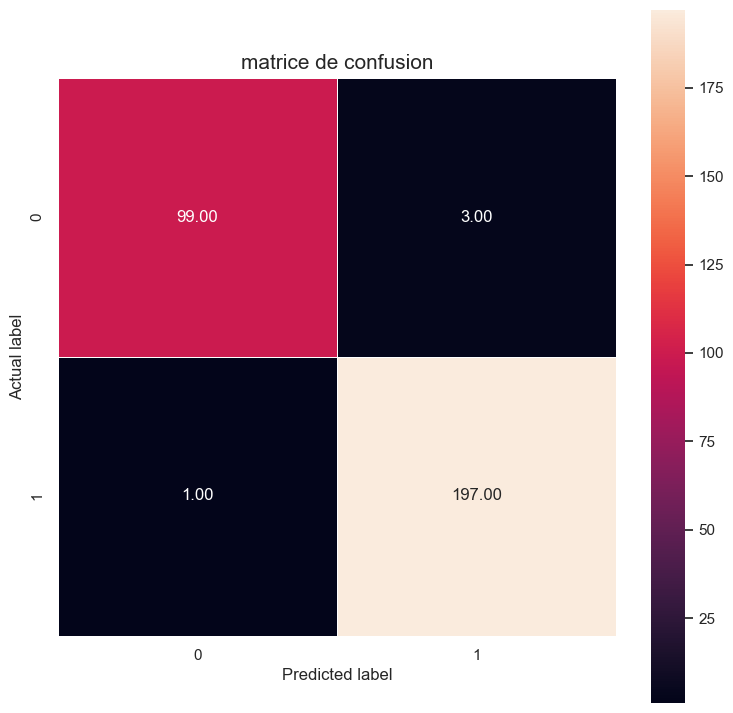

In [42]:
# affichage matrice
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt='.2f', linewidths=.5, square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_smaple_title = 'Accuracy Score : {0}' .format(score)
plt.title('matrice de confusion', size=15)
plt.show()

On observe des valeurs faibles dans les quadrant dédié aux faux postives et faux negatives, cela indique que notre modèle de régression logistique semble être plutôt performante.

#### <a name = 'T13'>6 - K-Means</a>

In [43]:
# test size
x_train, x_test, y_train, y_test = train_test_split(
    data_1, data['is_genuine'], test_size=0.20, random_state=0)

In [44]:
# init modèle 
kmeans = KMeans(n_clusters=2, max_iter=2000, algorithm='auto', random_state=1)
kmeans.fit(data_1)

KMeans(max_iter=2000, n_clusters=2, random_state=1)

In [45]:
# Prediction modèle 
pred_k = kmeans.predict(x_test)

Maintenant on calcul le F1 score pour évaluer la performance du modèle

In [46]:
# F1 score
f1_score(y_test, pred_k)

0.9899497487437187

Le modèle montre un F1 score presque du 99 % donc on procède avec une matrice de confusion pour mieux evaluer le modèle

##### <a name = 'T14'> 6.1 Matrice de confusion </a>

In [47]:
# preparation données pour la matrice de confusion
confusion_k = metrics.confusion_matrix(y_test, pred_k)

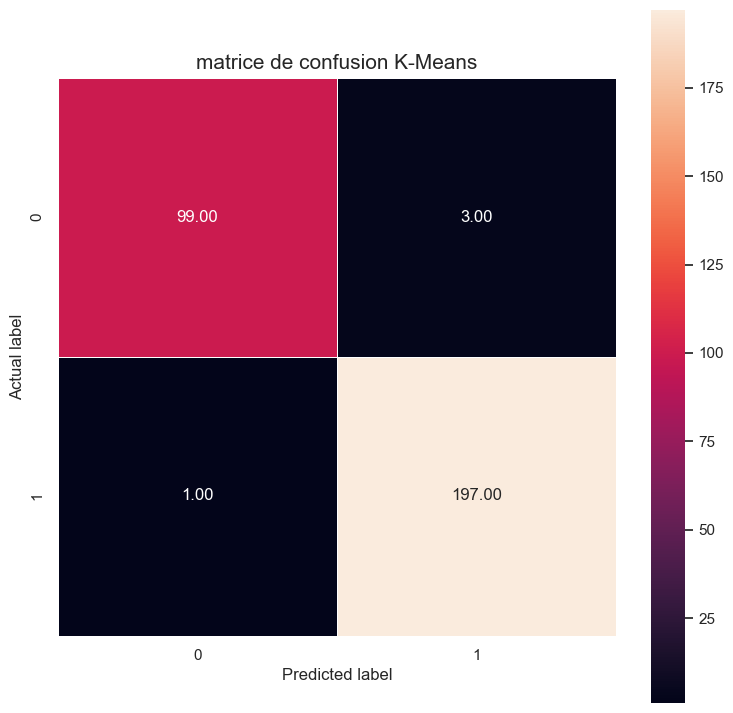

In [48]:
# affichage matrice
plt.figure(figsize=(9,9))
sns.heatmap(confusion_k, annot=True, fmt='.2f', linewidths=.5, square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_smaple_title = 'Accuracy Score : {0}' .format(score)
plt.title('matrice de confusion K-Means', size=15)
plt.show()

On observe des valeurs faibles dans les quadrant dédié aux faux postiives et faux negatives, cela indique que notre modèle avec le K-Means semble être plutôt performante.

##### <a name = 'T15'> 6.2 Valeurs test </a>

In [74]:
# import fichier test
b_test = pd.read_csv('billets_production.csv')

In [75]:
# afichage df test
b_test_t = b_test.copy()

In [76]:
# drop colonne
b_test_t.drop(columns='id', inplace=True)

In [97]:
# prediction avec KMeans
k_means = kmeans.predict(b_test_t)

In [98]:
# on predict les valeur test
res = logisticRegr.predict(b_test_t)

In [100]:
# creation colonne avec les resultat de la prediction
b_test['Resultats K_means'] = k_means

In [101]:
# prediction avec regression logistique
proba_1 = logisticRegr.predict_proba(b_test_t)[:,1]

In [102]:
# on ajoute un colonne avec les resultats de la regression logistique
b_test['Resultat'] = res

In [103]:
# on ajout un colone avec la probabilite que les valeurs soient vrais
b_test['probabilite'] = proba_1

In [104]:
# affichage valeurs test
b_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Resultat,probabilite,Resultats K_means
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.005574,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.000889,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001188,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.916409,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.999659,1


On peut effectivement observer que les valeurs qui étions prédit comme True, ont aussi un probabilité proche du 100%

In [105]:
# import valeurs de test soutenance
b_test_1 = pd.read_csv('billets_test.csv')

In [106]:
# creation copie du df
b_test_1_2 = b_test_1.copy()

In [107]:
# suppression de la colonne id
b_test_1_2.drop(columns='id', inplace=True)

In [108]:
# prediction avec KMeans
K_means_1 = kmeans.predict(b_test_1_2)

In [109]:
# prediction avec regression logistique
test = logisticRegr.predict(b_test_1_2)

In [110]:
# creation colonne avec les resultat de la prediction
b_test_1['Resultats K_means'] = K_means_1

In [111]:
# creation colonne avec les resultat de la prediction
b_test_1['Resultats LR'] = test

In [112]:
# calcul de la probabilité des valeurs Vrais
probabilite = logisticRegr.predict_proba(b_test_1_2)[:,1]

In [113]:
# creation colonne avec la probabilité 
b_test_1['Probabilité'] = probabilite

In [114]:
# affichage du Dataframe avec valeurs des test
b_test_1

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Resultats K_means,Resultats LR,Probabilité
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,1,True,0.990525
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0,False,0.008197
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,1,True,0.999185
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0,False,0.000167
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0,False,0.012395


On peut effectivement observer que les valeurs qui étions prédit comme True, ont aussi un probabilité proche du 100%